<a href="https://colab.research.google.com/github/AlexandraJMV/ADA-Informes/blob/main/Informe_2_MergeSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  ***MergeSort***

## **Problema: Ordenamiento de una secuencia de números**
---

En general, un problema de ordenamiento para *n elementos numéricos* se puede describir de la siguiente forma:

>**Entrada**: Secuencia de n números $[a_1,a_2,...,a_n]$
>
>**Salida**: Permutación ordenada de la secuencia de entrada: $[a_1',a_2',...,a_n']$, de tal manera que $a_1'\leq a_2' \leq... \leq a_n'$.

Buenas soluciones para problemas de ordenamiento son fundamentales para la optimización de otros procediminetos como por ejemplo la búsqueda binaria, algoritmo que depende de un arreglo ordenado de valores para poder implementarse.




##  **Descripción del algoritmo**

*MergeSort* es uno de los numerosos algoritmos que tiene como objetivo resolver el problema de ordenamiento anteriormente descrito. Utiliza el *paradigma divide y vencerás* para resolverlo, pues divide constantemente el problema en sub-problemas de forma recursiva, combinándolos en el arreglo resultante.


Su funcionamineto en código es el siguiente:
```
MergeSort(A,p,r):
    q = int(p+r/2)

    Si p == r : return       
    MergeSort(A,p,q)         # Llamada recursiva para sub-arreglo izquierdo
    MergeSort(A,q+1,r)       # LLamada recursiva para sub-arrgelo derecho
    Merge(A,p,q,r)
```

Como se puede observar, la función recibe tres parámetros
>> Un arreglo $A$ de $n$ elementos. Nótese que el valor de $n$ no es fijo para todas las llamadas recursivas pues dependerá de la *'profundidad'* en la cual nos encontremos, razón por la cual $n$ no es un parámetro.
>
>>Índices $p$ y $r$, correspondientes a los límites superiores e inferiores del arreglo que se quiere ordenar.

Dada las dos llamadas recursivas que se realiza dentro de la función `MergeSort`, se puede representar como un árbol binario. Más adelante se mostrará un ejemplo de esta representación.

Dado un arreglo $a$ cualquiera, se puede decir que los parámetros iniciales *(primera llamada a la función)* serán $0$ y $len(a)-1$, pues abarcan la totalidad de la estructura. 

Para futuras iteraciones dependerán de la implemenación que se utilice. Si se separan los sub-arreglos generados al dividir el problema, seguirá la misma lógica. Para trabajar con índices hay que utilizar la suma de los límites con tal de encontrar el elemento medio. 


MergeSort se preocupa básicamente de dividir el arreglo original hasta sus menores componentes, contribuyendo a la parte de **divide** en *divide y vencerás*. Sin embargo, se puede ver en el ejemplo de código anterior una segunda función, llamada `Merge`, y que resulta ser parte fundamental del algoritmo pues es aquella que se encarga del ordenamiento y unificación de los datos, dados dos arreglos y correspondiendo a la resolución de los sub-problemas y unificación en *divide y vencerás*. A continuación se explicará a detalle.


###  **Función *Merge***

Esta función es la parte principal para el buen funcionamiento del algoritmo. Es aquella que se encarga de verdadero ordenamiento de datos, pues el resto de la operaciones consiste llamadas a funciones y división de arreglos.

Se ha decidido implementar de la siguiente forma:

> ***Merge*** recibirá cuatro parámetros
>
>>El arreglo $A$ a ordenar
>
>>El índice $p$, correspondiente al primer elemento del primer sub-arregl ordenado dentro de $A$, $A[p..q]$
>
>>El índice $q$, correspondientes al delimitador entre ambos sub-arreglos ordenados en $A$, $A[p..q]$ y $A[q+1..r]$
>
>>El índice $r$, elemento final del segundo sub-arreglo ordenado en $A$, $A[q+1...r]$



Se recalca nuevamente como los dos sub-arreglos contenidos o derivados de $A$ se encuentran siempre ordenados. Si no fuese así, el algortimo no podría realizar su trabajo.

<br> En general, funcionará de la siguiente forma:
1. Se crea el  arreglo final $B$ vacío. Este se encargará de almacenar los datos ordenados.
2. Se comparan elemento a elemento los valores dentro de ambos arreglos. Aquel valor que sea menor se insertará dentro de $B$, haciendo una eliminación o avance de índice dentro del arreglo del cual se extrajo.
3. Continuar el procedimiento hasta que alguno de los arreglos contenga 0 elementos *(O el índice inferior sea menor que el superior)*, situación en la cual se insertarán todos los elementos restantes del otro al final de $B$


<img src="https://i.imgur.com/OTM3Bxm.png" alt="Funcionamiento Merge"
     width="500"> <br>

Una vez se tenga el arreglo ordenado, este se retornará para futuras llamadas a Merge o reemplazará dentro de A.

## **Ejemplo funcionamiento MergeSort**
Consideremos el arreglo: $a = [9,0,1,3,7]$ <br>
La siguiente imagen representa los pasos realizados por el algoritmo para entregar el arreglo ordenado:

<img src="https://i.imgur.com/GcN72Jg.png" 
     alt="arreglo a en MergeSort"
     width="600" height="600">

A pesar de la implementación utilizada en este informe, el valor de $q$ en la imagen es relativa al tamaño del arreglo para mejorar el entendimiento del diagrama.

Los números acompañando cada arreglo representan el orden con el cual se realiza cada acción, independiente de lo que implique su representación como árbol binario. Se observa como, para cualquier arreglo divisible, se parte desde la rama izquierda hasta llegar a un arreglo de un sólo elemento, situación en lacual empiezan a ocurrir las combinaciones de arreglos.
Esto tiene sentido teniendo en mente la recursividad del algoritmo, pues solo al terminar de realizarse toda una llamada de función, se considerará la otra.


## **Implementación Merge**
Se ha decidido implementar la función `Merge` de la siguiente forma:


In [2]:
def Merge(A,p,q,r):
  arr_B = []
  c = 0                # Número de comparaciones

  cpy_q = q            # Almacenar valor inicial de 
  cpy_p = p            # q y p para futuras operaciones
  q+= 1                

  while p != cpy_q+1 and q != r+1:
    c += 1
    if A[p] <= A[q] : arr_B.append(A[p]) ; p+= 1   # Caso en el cual valor derecho es menor (o igual)
    elif A[q] < A[p] : arr_B.append(A[q]) ; q+= 1  # Caso izquierdo

  if p == cpy_q+1:                                 # Agregar elementos sobrantes
    arr_B += A[q:r+1]
  elif  q == r+1:
    arr_B += A[p:cpy_q+1]

  A[cpy_p:r+1] = arr_B                             # Copiar contenidos en dentro de rango
  
  return arr_B , c

La función:
> Crea el arreglo $B$

> Recorre los sub-arreglos $A[p..q]$ y $A[q+1..r]$ a través de movimientos de índices, guardando los valores iniciales de $p$ y $q$ para futuras operaciones. El recorrido consiste en mover índices hasta que el límite inferior del arreglo sea igual al superior en alguno de los dos, significando que quedan $0$ elementos a comparar.
>
>Los valores de p y r dependerán de la llamada a la función en la que nos encontremos. Por ejemplo, en la primera llamada *(situación no recursiva)* los valores serían $0$ y $len(A)$, mientras que $q$ corresponde al elemento medio entre $p$ y $r$, $q = int(p+r/2)$

> Por cada iteración, inserta un elemento en B, correspondiente al menor *(o igual)* entre $A[p]$ y $A[q]$. Se avanza el índice correspondiente.

> Sea alguno de los índices igual a su límite superior, nos encontramos con un arreglo vacío. Se termina el recorrido y se insertan los elementos sobrantes de la contraparte al final de $B$.

>Para  finalizar, se sobreescribe el arreglo ordenado $B$ en $A$, teniendo cuidado de respetar el rango del arreglo $[p..r]$

La función retorna el arreglo $B$ ordenado y $c$, correspondiente al total de comparaciones realizadas.

## **Implementación MergeSort**
Esta implementación del algoritmo `MergeSort` es capaz de recibir 7 parámetros en teoría. Sin embargo, las variables $c$, $steps$ e $i$ son principalmente para controlar ciertos valores en las llamadas recursivas de la función y su función será descrita más adelante.

Con esto en mente, esta implementación de `MergeSort` recibe cuatro parámetros:
> El arreglo $A$, que contiene los $n$ elementos a ordenar.

> Los índices $p$ y $r$, que corresponden a los límites inferior y superior del arreglo *(o sub-arreglo)* que se desea ordenar en la llamda actual de la función.

> El booleano $verbose$, que indica si el usuario desea ver la ejecución de la  función paso por paso.

Los otros tres parámetros, a pesar de no ser realmente utilizables al realizar la llamada original a la función, son:

> El entero $c$, correspondiente a un contador de comparaciones.

> El entero $i$, correspondiente al 'nivel' de cierta operación. Este nivel se refiere a la altura que estaría cierto paso en su representación como árbol binario.

> El entero $steps$, que sirve como registro de los pasos que se realizan dentro del algoritmo.


In [73]:
def MergeSort(A, p, r, c = 0, i = 1, steps = 0, verbose = False):
   queue = []                    # Lista guarda información por iteración
   queue.append((A[p:r+1], i, steps)) 
   

   if p==r: return c, queue      # Verifica que el arreglo tenga un solo elemento 
 
   q = int((p+r)/2)              # La mitad del arreglo
   c_izq, q_izq = MergeSort(A,p,q,i=i+1, steps = queue[-1][2]+1 ,verbose = verbose)   # Ordenamiento de rama izquierda
   
   if verbose == True:
     for j in q_izq:
      queue.append(j)          

   c_der, q_der = MergeSort(A,q+1,r,i=i+1,steps = queue[-1][2]+1 ,verbose = verbose)   # Ordenamiento rama derecha
   if verbose == True:
     for j in q_der:
        queue.append(j)

   b,c = Merge(A,p,q,r)             # Ordenamiento de ambas ramas
   if verbose == True:
     queue.append((b,f"merge",queue[-1][2]+1))
   
   c += c_izq+c_der

   if i == 1 and verbose == True:
     mrgs = 1
     prev = -1
     for i in queue:
       if i[2] == 0 : 
         print(f"Arreglo inicial: {i[0]}\n") 
         prev = i[1]
         continue

       print(f"Paso {i[2]}")
       if i[1] == "merge": 
         print(f"Se ha realizado el Merge nº{mrgs}!")
         print(f"Arreglos ordenados y unidos:")
         
         mrgs+=1
       else:
         print("Se ha dividido el arreglo!")
       print(i[0], "\n")
       
       print("-------------------------------------")

     print()
     print(f"Total comparaciones: {c}")
     print("Arreglo ordenado!")
   
   return c, queue

In [4]:
# Ejemplo
from numpy.random import seed
from numpy.random import randint

seed(99)

a = randint(0, 30, 7)
a = a.tolist()

print('imput', a)
print("Total comparaciones :",MergeSort(a ,0,len(a)-1)[0])
print('output', a)

imput [1, 3, 25, 8, 9, 8, 18]
Total comparaciones : 13
output [1, 3, 8, 8, 9, 18, 25]


###  Ejecución paso a paso `(verbose=True)`


In [74]:
a = [9,0,1,3,7]
c, qu = MergeSort(a ,0,len(a)-1, verbose=True)

Arreglo inicial: [9, 0, 1, 3, 7]

Paso 1
Se ha dividido el arreglo!
[9, 0, 1] 

-------------------------------------
Paso 2
Se ha dividido el arreglo!
[9, 0] 

-------------------------------------
Paso 3
Se ha dividido el arreglo!
[9] 

-------------------------------------
Paso 4
Se ha dividido el arreglo!
[0] 

-------------------------------------
Paso 5
Se ha realizado el Merge nº1!
Arreglos ordenados y unidos:
[0, 9] 

-------------------------------------
Paso 6
Se ha dividido el arreglo!
[1] 

-------------------------------------
Paso 7
Se ha realizado el Merge nº2!
Arreglos ordenados y unidos:
[0, 1, 9] 

-------------------------------------
Paso 8
Se ha dividido el arreglo!
[3, 7] 

-------------------------------------
Paso 9
Se ha dividido el arreglo!
[3] 

-------------------------------------
Paso 10
Se ha dividido el arreglo!
[7] 

-------------------------------------
Paso 11
Se ha realizado el Merge nº3!
Arreglos ordenados y unidos:
[3, 7] 

------------------------

#### ***Anotaciones***

La implementación actual solo es capaz de manejar listas de números. Esto se debe a las pequeñas diferencias a la hora de manipular listas, arreglos y arreglos numpy, por nombrar un ejemplo.

Se necesitará adaptar el algoritmo o bien preocuparse de solo ingresar listas a la función MergeSort.


## **Correctitud del algoritmo**

### **Correctitud para Merge**
#### ***Teorema:***
Merge recibe dos arreglos ordenados $A_1$ y $A_2$, retornando al finalizar un arreglo $B$ que contiene todos los elementos de $A_1 \cup A_2$ de forma que $b_1 ≤ b_2 ≤... b_n$

#### ***Propiedad invariable de bucle para Merge:***
Para cada iteración dentro de la función *Merge*, los arreglos $B$, $A_1$, y $A_2$ se encuentran siempre ordenados, siendo los valores en $A_1$ y $A_2$ siempre menores a aquellos en $B$

##### **Inicialización:**
Antes de iniciar la primera iteración, se cumple con ambas condiciones

1. Al estar $B$ vacío y asumiendo que $A_1$ y $A_2$ se encuentran ordenados al entrar a la función, se concluye que los tres arreglos se encuentran ordenados al inicio del bucle.

2. Nuevamente, al encontrarse $B$ vacío todos los valores de $A_1 \cup A_2$ son trivialmente mayores.

##### **Mantención:**
Para cualquier iteración $i$ del bucle, se comparará y se eliminará el elemento más pequeño de $A_1 \cup A_2$, insertándose en $B$. Esto mantiene la idea de que $B$ siempre contendrá elementos menores a aquellos en  $A_1 \cup A_2$. 

Además, al realizarse las comparaciones en arreglos ordenados, se verifica que el elemento $B[i+1]$ va a ser mayor que $B[i]$, pues será el $i+1$-ésimo más pequeño del conjunto $A_1 \cup A_2$, manteniendo el orden propuesto.

Por último, siempre y  que no se realicen inserciones de valores, un arreglo ordenado se mantendrá así sin importar qué elementos se eliminen de el.

#### **Correctitud**
Como la propiedad se mantiene al inicio y final de la  i -ésima iteración, se puede concluir que cuando se termine de realizar la última iteración del bloque *($A_1$ o $A_2$ no poseen más elementos comparables y se han insertado los sobrantes)*, el arreglo $B$ contendrá la totalidad de los elementos ordenados del conjunto $A_1 \cup A_2$, encontrándose estos ordenados trivialmente al tener $0$ elementos que comparar y cumpliendo con el teorema  propuesto.




### **Correctitud para MergeSort**
#### **Hipótesis:**
*MergeSort* recibe un arreglo $A$ de $n$ elementos, retornando el arreglo ordenado de forma que $a_1 ≤ a_2 ≤... a_n$

#### ***Caso base***
Para el caso base $n=1$, se cumple la declaración pues al ser un elemento único se encuentra trivialmente ordenado.

#### ***Paso inductivo***
Para un arreglo de $n$ elementos, al realizar la llamada de MergeSort y dividir el problema  de forma recursiva, se llegará a sub-arreglos de $A$ con elementos únicos *($len=1$)*. 

Según el Teorema anterior, *Merge* siempre retornará arreglos ordenados a partir de los sub-arreglos entregados como parámetros, por lo que se puede concluir que al finalizar cualquier llamada de MergeSort, para un $m < n$ , tendremos un arreglo ordenado. Esto implica que cuando eventualmente se realice el *Merge* para  $m_1=\lfloor \frac{n}{2}\rfloor$ y  $m_2=\lfloor \frac{n}{2}\rfloor$, se terminará con un arreglo ordenado de $n$ elementos.

Por lo tanto *MergeSort* es correcto

## **Tiempo de ejecución**
El algoritmo *MergeSort* divide un arreglo en 2 sub-arreglos de tamaño $n/2$ recursivamente, lo que corresponde a $2 \cdot T(n/2)$. Además, por cada llamada a la función se le agrega el tiempo que cuesta dividir el problema y el coste de la función *Merge*.

*Merge* tiene un tiempo de ejecución lineal pues recorre una sola vez los arreglos a ordenar, correspondiendo a un tiempo de ejecución de $O(n)$

La división del arreglo es constante, $O(n)$.

Por último, para el caso base donde $n = 1$, el tiempo de ejecución será $0(1)$ puesto a que el arreglo inicial se encontraría trivialmente ordenado.

Así, finalizamos con la siguiente ecuación:

$T(n) =\begin{cases}
  O(1)  & n = 1 \\
  2 T(n/2) + O(n) + O(1) & \text{ otherwise}
\end{cases}$

la cual se puede simplificar a

$T(n) = \begin{cases}
  O(1)  & n = 1 \\
  2 T(n/2) + O(n) & \text{ otherwise}
\end{cases}$

## **Experimentación**

### **Número de comparaciones**

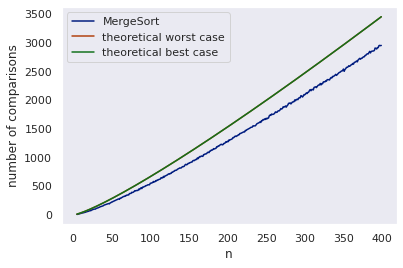

In [76]:
#comparar el número de comparaciones realizadas experimentalmente con el mejor y peor caso teóricos.
import matplotlib.pyplot as plt
import seaborn as sns
from math import log2
import random

%matplotlib inline

sns.set(context='notebook', style='dark', palette='dark')

x=[n for n in range(5,400)] 
y1=[n*log2(n) for n in range(5,400)] # worst case
y2=[n*log2(n) for n in range(5,400)] # best case
y=[]; 

for n in range(5,400):
  a = random.sample(range(1, 400), n)
  counter, qu = MergeSort(a,0,len(a)-1)
  y.append(counter)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["MergeSort", "theoretical worst case", "theoretical best case"])

plt.xlabel('n')
plt.ylabel('number of comparisons')
plt.show()

### Conclusión
Se ha asumido que el mejor y peor caso de ***comparaciones*** es de $n⋅log(n)$. Sin embargo, se nota claramente en el gráfico que este análisis es érroneo pues el algoritmo no debería ser capaz de sobrepasar el límite inferior como se muestra aquí.


### MergeSort vs InsertionSort

### **Tiempo de ejecución**


In [80]:
import numpy as np
from termcolor import colored

def insertion_sort(a, verbose = False):
  n = len(a)        # Tamaño del arreglo a ordenar
  c = 0             # Número de comparaciones

  if verbose == True:
    print("imput array :", a, "\n")

  for i in range(1, n):
    key = a[i]
    is_zero = False # Auxiliar para la empresión en caso de que verbose = True

    if verbose == True: 
      print("Pasada ", i, ", ",colored(f"key : {key}", "red", attrs=["bold"]) )
    
    for k in range(i-1, -1, -1):
      c+= 1

      if verbose == True: 
        # Destacar valor con el que se comparara key
        if k > 0: print(" ",end = "")
        if k == i-1:
          print("  ", str(a[:k])[1:-1], colored(f"{str(a[k:k+1])[1:-1]}", "blue", attrs=['bold']),
                colored(f"{str(a[k+1:k+2])[1:-1]}", "red", attrs=['bold']), str(a[k+2:])[1:-1])
        else:
          print("  ", str(a[:k])[1:-1], colored(f"{str(a[k:k+1])[1:-1]}",  "blue", attrs=['bold']), str(a[k+1:])[1:-1])

      # Inserción de clave en la posición correspondiente 
      if a[k] < key:
        a[k+1] = key
        break

      # Movimiento de elemento k una posición a la izquierda
      a[k+1] = a[k]

      if verbose == True:
        if k > 0: print(" ",end = "")
        print("  ", str(a[:k])[1:-1], colored(f"{str(a[k:k+2])[1:-1]}", "green", attrs=['bold']), str(a[k+2:])[1:-1])
    
    # Insercion de clave en caso especial
    if key < a[0]: 
      a[0] = key
      is_zero = True

    if verbose == True:

      if is_zero:
        print(colored(f"\n{str(a[0])[1:-1]}", "red", attrs=['bold']), str(a[1:])[1:-1])
        print(f"{key} ha finalizado en la posición {0}\n")
      else:
        print("\n", str(a[:k+1])[1:-1], colored(f"{str(a[k+1:k+2])[1:-1]}","red", attrs=['bold']), str(a[k+2:])[1:-1])
        print(f" {key} ha finalizado en la posición {k+1}\n")

  
  if verbose == True:
    print("Arreglo ordenado !")
    print(f"output array:: {a}")
  
  return a, c

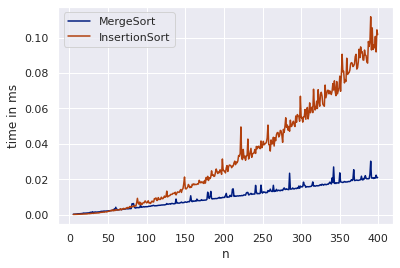

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from timeit import repeat

%matplotlib inline

sns.set(context='notebook', style='darkgrid', palette='dark')

x=[]; x2 =[]
y=[]; y2=[]

for n in range(5,400):

  a = random.sample(range(1, 1000), n)
  t = repeat(setup="from __main__ import MergeSort", stmt=f"MergeSort({a},{0},{len(a)-1})", repeat=1, number=10)

  x.append(n)
  y.append(t)

for n in range(5,400):

  a = random.sample(range(1, 1000), n)
  t = repeat(setup="from __main__ import insertion_sort", stmt=f"insertion_sort({a})", repeat=1, number=10)

  x2.append(n)
  y2.append(t)

plt.plot(x,y)
plt.plot(x2,y2)
plt.legend(["MergeSort", "InsertionSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

Se observa claramente la diferencia entre tiempos de ejecución de ambos algoritmos, dejando en claro cual es la opción óptima en cuanto a análisis temporal. 

Diría que siempre y cuando el tamaño del arreglo sea superior a los 100 o 150 elementos, no vale la pena siquira considerar el algoritmo InsertionSort.

Sin embargo, no estaría demás analizar de alguna forma la cantidad de memoria utilizada por ambos algoritmos en su ejecución, pues entregaría información vital a la hora de evaluar cual de los dos conviene más según la situación.